In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
train_data = "training/"


batch_size = 64
img_height = 150
img_width = 150

In [3]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255 ,validation_split=0.2)
                                 
                                 
train_generator = train_datagen.flow_from_directory(train_data,
                                                   target_size=(img_width, img_height),
                                                   batch_size=batch_size,
                                                 
                                                   subset="training",
                                                   seed=123,
                                                   shuffle=True)

Found 11596 images belonging to 3 classes.


In [4]:
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255 ,validation_split=0.2)
                                 
                                 
val_generator= val_datagen.flow_from_directory(train_data,
                                                   target_size=(img_width, img_height),
                                                   batch_size=batch_size,
                                                   
                                                   subset="validation",
                                                   seed=123,
                                                   shuffle=True)

Found 2898 images belonging to 3 classes.


In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_generator.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

AttributeError: 'DirectoryIterator' object has no attribute 'take'

<Figure size 720x720 with 0 Axes>

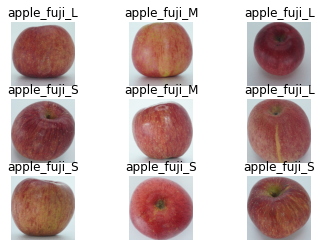

In [86]:
for images, labels in val_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")    

In [36]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

for image_batch, labels_batch in val_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(64, 180, 180, 3)
(64,)
(64, 180, 180, 3)
(64,)


In [9]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:
num_classes = 3

model = Sequential([
  layers.InputLayer(input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3,  activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3,  activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 178, 178, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 89, 89, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 87, 87, 32)        4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 43, 43, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 41, 41, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 20, 20, 64)      

In [12]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/15
199/199 [==============================] - 58s 260ms/step - loss: 7.6014 - accuracy: 0.7442 - val_loss: 1.0084 - val_accuracy: 0.7246
Epoch 2/15
199/199 [==============================] - 23s 112ms/step - loss: 0.2160 - accuracy: 0.9190 - val_loss: 1.9742 - val_accuracy: 0.7025
Epoch 3/15
199/199 [==============================] - 6s 30ms/step - loss: 0.1132 - accuracy: 0.9574 - val_loss: 1.7663 - val_accuracy: 0.7329
Epoch 4/15
199/199 [==============================] - 6s 30ms/step - loss: 0.0743 - accuracy: 0.9734 - val_loss: 1.9144 - val_accuracy: 0.7263
Epoch 5/15
199/199 [==============================] - 6s 30ms/step - loss: 0.0667 - accuracy: 0.9763 - val_loss: 2.3468 - val_accuracy: 0.7583
Epoch 6/15
199/199 [==============================] - 6s 32ms/step - loss: 0.0540 - accuracy: 0.9795 - val_loss: 1.6915 - val_accuracy: 0.7682
Epoch 7/15
199/199 [==============================] - 6s 32ms/step - loss: 0.0473 - accuracy: 0.9838 - val_loss: 3.3358 - val_accuracy: 0.

ValueError: x and y must have same first dimension, but have shapes (10,) and (15,)

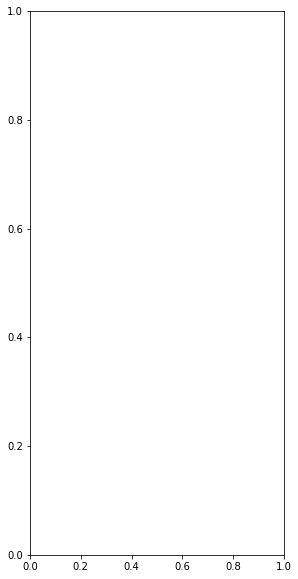

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
#전형적인 overfit

In [20]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.5),
    layers.experimental.preprocessing.RandomZoom(0.01),
  ]
)

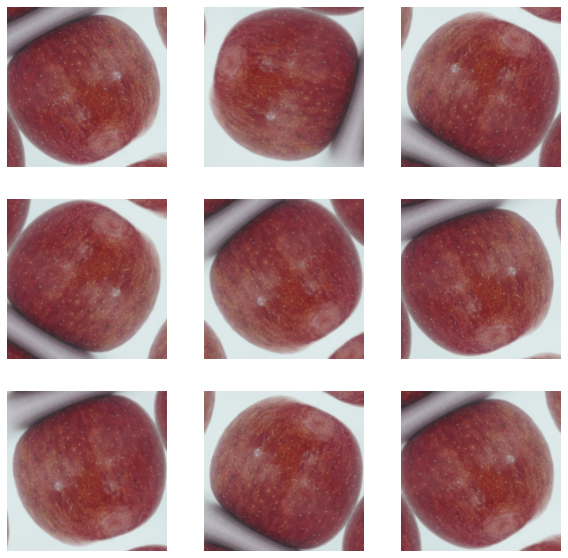

In [21]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [22]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [23]:
# model.compile(optimizer='Adam',
#               loss="SparseCategoricalCrossentropy",
#               metrics=['accuracy'])

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])


In [24]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [25]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
199/199 [==============================] - 8s 36ms/step - loss: 0.8273 - accuracy: 0.6178 - val_loss: 1.1487 - val_accuracy: 0.5430
Epoch 2/15
199/199 [==============================] - 7s 37ms/step - loss: 0.6004 - accuracy: 0.7451 - val_loss: 0.9847 - val_accuracy: 0.6838
Epoch 3/15
199/199 [==============================] - 7s 37ms/step - loss: 0.5051 - accuracy: 0.7882 - val_loss: 0.8325 - val_accuracy: 0.7070
Epoch 4/15
199/199 [==============================] - 7s 36ms/step - loss: 0.4569 - accuracy: 0.8139 - val_loss: 0.8803 - val_accuracy: 0.7036
Epoch 5/15
199/199 [==============================] - 7s 36ms/step - loss: 0.4172 - accuracy: 0.8276 - val_loss: 0.7464 - val_accuracy: 0.7472
Epoch 6/15
199/199 [==============================] - 7s 35ms/step - loss: 0.3721 - accuracy: 0.8505 - val_loss: 0.7459 - val_accuracy: 0.7528
Epoch 7/15
199/199 [==============================] - 7s 36ms/step - loss: 0.3405 - accuracy: 0.8629 - val_loss: 0.7015 - val_accuracy: 0.7704

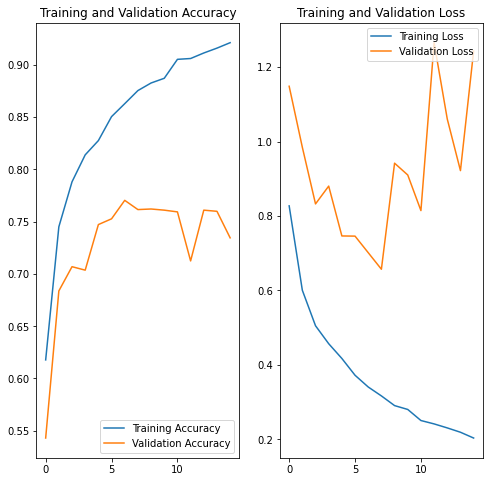

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:

path='apple/das.png'
img=tf.keras.preprocessing.image.load_img(
    path,target_size=(img_height, img_width)
)

In [38]:
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

In [39]:
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to apple_yanggwang_M with a 96.21 percent confidence.


In [64]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\82103\AppData\Local\Temp\tmpe6qeyets\assets


In [40]:
# for data_batch, labels_batch in train_generator:
#     print('배치 데이터 크기:', data_batch.shape)
#     print('배치 레이블 크기:', labels_batch.shape)
#     break

배치 데이터 크기: (0, 150, 150, 3)
배치 레이블 크기: (0,)
